In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 26 17:02:49 2020

@author: nyzw
"""

#install packages if needed
#pip install #####


#import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import rcParams
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.anova import anova_lm

In [3]:
#Import in xlsx file
FB = pd.read_excel('Facebook_Post_Prediction_Truncated.xlsx')

In [4]:
#Look at data - visually look! 
#(may also open data frame in IDE to get a "cleaner" look)

#Look at the dataset dimensions
FB.shape

(3576, 17)

In [5]:
#Check the variable types
FB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   PagePopularity       3576 non-null   int64
 1   PageCheckin          3576 non-null   int64
 2   PageTalkingAbout     3576 non-null   int64
 3   PageCategory         3576 non-null   int64
 4   CommentCount24       3576 non-null   int64
 5   PostLength           3576 non-null   int64
 6   PostShareCount       3576 non-null   int64
 7   PostPromotionStatus  3576 non-null   int64
 8   TimeLikesMeasured    3576 non-null   int64
 9   PostSunday           3576 non-null   int64
 10  PostMonday           3576 non-null   int64
 11  PostTuesday          3576 non-null   int64
 12  PostWednesday        3576 non-null   int64
 13  PostThursday         3576 non-null   int64
 14  PostFriday           3576 non-null   int64
 15  PostSaturday         3576 non-null   int64
 16  NumberLikes24        357

In [6]:
#Summary Statistics for dataset
SummaryResults = FB.describe(include='all')

In [7]:
FB.describe(include='all')

,PagePopularity,PageCheckin,PageTalkingAbout,PageCategory,CommentCount24,PostLength,PostShareCount,PostPromotionStatus,TimeLikesMeasured,PostSunday,PostMonday,PostTuesday,PostWednesday,PostThursday,PostFriday,PostSaturday,NumberLikes24
count,3.576000e+03,3.576000e+03,3.576000e+03,3576.000000,3576.000000,3576.000000,3576.000000,3576.0,3576.0,3576.000000,3576.0,3576.0,3576.0,3576.000000,3576.000000,3576.000000,3576.000000
mean,3.892342e+06,5.963859e+03,2.356619e+05,22.879754,99.506432,148.202740,193.962248,0.0,24.0,0.035794,0.0,0.0,0.0,0.366611,0.366890,0.230705,30.199385
std,8.446233e+06,4.629343e+04,4.506870e+05,19.699124,248.893619,349.325872,1001.633919,0.0,0.0,0.185803,0.0,0.0,0.0,0.481946,0.482024,0.421343,104.575135
min,8.250000e+02,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.0,24.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,4.299050e+05,0.000000e+00,1.631500e+04,9.000000,3.000000,44.000000,3.000000,0.0,24.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.514256e+06,0.000000e+00,6.951100e+04,20.000000,17.000000,97.000000,25.000000,0.0,24.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.000000
75%,4.351476e+06,2.700000e+01,2.598920e+05,34.000000,72.250000,161.000000,104.250000,0.0,24.0,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,14.000000
max,1.626244e+08,1.100558e+06,6.784263e+06,107.000000,2673.000000,10405.000000,40428.000000,0.0,24.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,2412.000000


In [8]:
#Simple linear regression (1 DV, 1 IV - both continuous)
#X will be our  independent variable(s)
X = FB["CommentCount24"] 
#Y will be our dependent variable
Y = FB["NumberLikes24"] 
#we need to add an intercept on our model
X = sm.add_constant(X)
#create our linear model
NumberLikesModel = sm.OLS(Y, X).fit() 
NumberLikesModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NumberLikes24   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     722.8
Date:                Tue, 05 May 2020   Prob (F-statistic):          3.66e-145
Time:                        18:11:23   Log-Likelihood:                -21372.
No. Observations:                3576   AIC:                         4.275e+04
Df Residuals:                    3574   BIC:                         4.276e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.0515      1.718      7.597      0.000       9.683      16.420
CommentCount24     0.1723      0.006     26.885      0.000       0.160       0.185
==============================================================================
Omnibus:                     5805.886   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4838888.239
Skew:                          10.488   Prob(JB):                         0.00
Kurtosis:                     181.985   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

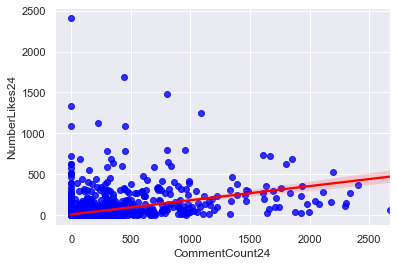

In [9]:
#Plot the regression model
sns.set(color_codes=True)
ax = sns.regplot(x="CommentCount24", y = "NumberLikes24", data  = FB,
                     scatter_kws = {"color": "blue"},
                     line_kws = {"color": "red"})

In [10]:
#Simple linear regression (1 DV, 1 IV - both continuous)
#X will be our  independent variable(s)
X = FB["PostShareCount"] 
#Y will be our dependent variable
Y = FB["NumberLikes24"] 
#we need to add an intercept on our model
X = sm.add_constant(X)
#create our linear model
NumberLikesModel = sm.OLS(Y, X).fit() 
NumberLikesModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NumberLikes24   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     149.8
Date:                Tue, 05 May 2020   Prob (F-statistic):           8.85e-34
Time:                        18:11:24   Log-Likelihood:                -21628.
No. Observations:                3576   AIC:                         4.326e+04
Df Residuals:                    3574   BIC:                         4.327e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             26.1373      1.745     14.976      0.000      22.715      29.559
PostShareCount     0.0209      0.002     12.241      0.000       0.018       0.024
==============================================================================
Omnibus:                     5372.881   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2893444.921
Skew:                           9.082   Prob(JB):                         0.00
Kurtosis:                     141.164   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

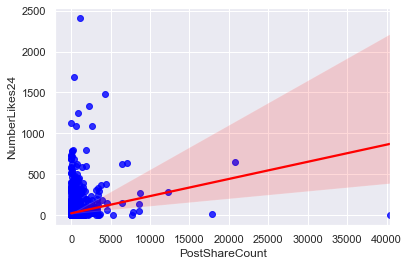

In [11]:
#Plot the regression model
sns.set(color_codes=True)
ax = sns.regplot(x="PostShareCount", y = "NumberLikes24", data  = FB,
                     scatter_kws = {"color": "blue"},
                     line_kws = {"color": "red"})

In [12]:
#Calculate Predicted Values on current dataset
FB['Y_NumberLikesModel'] = NumberLikesModel.predict(X)

In [13]:
print(X)
print(Y)

      const  PostShareCount
0       1.0               2
1       1.0               1
2       1.0               2
3       1.0            1815
4       1.0               1
...     ...             ...
3571    1.0             968
3572    1.0             433
3573    1.0             206
3574    1.0            3392
3575    1.0             673

[3576 rows x 2 columns]
0          1
1          0
2          0
3        292
4          0
        ... 
3571      21
3572      11
3573      21
3574     247
3575    1087
Name: NumberLikes24, Length: 3576, dtype: int64


In [14]:
#Assessing prediction accuracy
#Create Training and Test data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state = 123)
#Build the model on training data
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_train_pred = lr.predict(X_train)
#Predict earnings on test data using model from training data
Y_test_pred = lr.predict(X_test)

In [15]:
#compare RMSE between train and test datasets
print("RMSE training data = ", np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)))
print("RMSE testing data = ", np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

RMSE training data =  99.77208317037878
RMSE testing data =  112.78935109118143


Correlation
0.3160561845239811


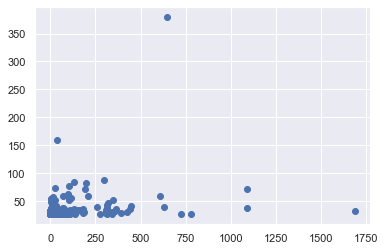

In [16]:
#look at correlation between actual and predicited in test data
from scipy.stats import pearsonr
stat, p = pearsonr(Y_test, Y_test_pred)
print('Correlation')
print(stat)
plt.scatter(x=Y_test , y=Y_test_pred)

In [17]:
#Diagnostics for our simple linear regression (Full Model)
NumberLikesModel = sm.OLS(Y, X).fit() 
NumberLikesModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NumberLikes24   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     149.8
Date:                Tue, 05 May 2020   Prob (F-statistic):           8.85e-34
Time:                        18:11:25   Log-Likelihood:                -21628.
No. Observations:                3576   AIC:                         4.326e+04
Df Residuals:                    3574   BIC:                         4.327e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             26.1373      1.745     14.976      0.000      22.715      29.559
PostShareCount     0.0209      0.002     12.241      0.000       0.018       0.024
==============================================================================
Omnibus:                     5372.881   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2893444.921
Skew:                           9.082   Prob(JB):                         0.00
Kurtosis:                     141.164   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

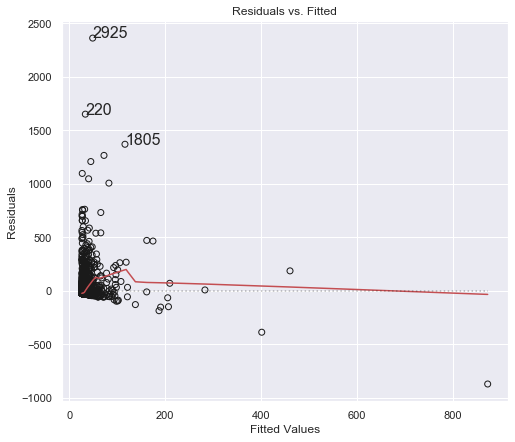

In [18]:
#Residuals vs Fitted Plot
residuals = NumberLikesModel.resid
fitted = NumberLikesModel.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

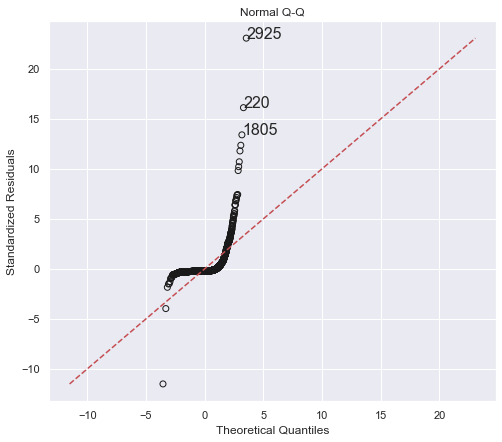

In [19]:
#Normal Q-Q plot
sorted_student_residuals = pd.Series(NumberLikesModel.get_influence().resid_studentized_internal)
sorted_student_residuals.index = NumberLikesModel.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

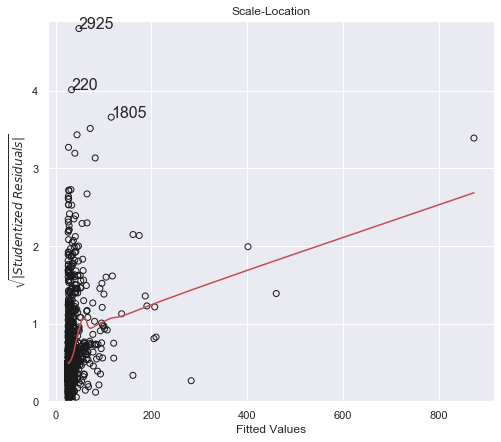

In [20]:
#Scale - Location Plot
student_residuals = NumberLikesModel.get_influence().resid_studentized_internal
sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
sqrt_student_residuals.index = NumberLikesModel.resid.index
smoothed = lowess(sqrt_student_residuals,fitted)
top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

fig, ax = plt.subplots()
ax.scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_student_residuals)+0.1)
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
plt.show()

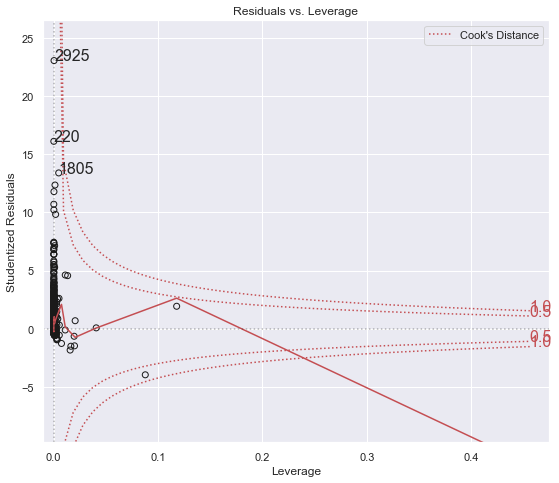

In [21]:
#Residuals vs. Leverage
student_residuals = pd.Series(NumberLikesModel.get_influence().resid_studentized_internal)
student_residuals.index = NumberLikesModel.resid.index
df = pd.DataFrame(student_residuals)
df.columns = ['student_residuals']
df['leverage'] = NumberLikesModel.get_influence().hat_matrix_diag
smoothed = lowess(df['student_residuals'],df['leverage'])
sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
top3 = sorted_student_residuals[:3]

fig, ax = plt.subplots()
x = df['leverage']
y = df['student_residuals']
xpos = max(x)+max(x)*0.01  
ax.scatter(x, y, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
ax.set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
ax.set_xlim(-0.01,max(x)+max(x)*0.05)
plt.tight_layout()
for val in top3.index:
    ax.annotate(val,xy=(x.loc[val],y.loc[val]))

cooksx = np.linspace(min(x), xpos, 50)
p = len(NumberLikesModel.params)
poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax.legend()
plt.show()

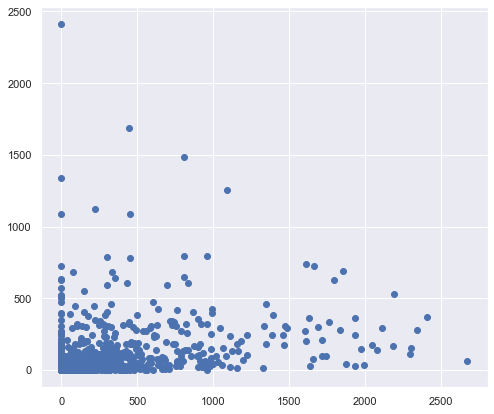

In [22]:
#Statistical Assumptions
#Linearity (DV and IV)
plt.scatter(x=FB['CommentCount24'] , y=FB['NumberLikes24'])

Shapiro Statistic=0.419, p=0.000


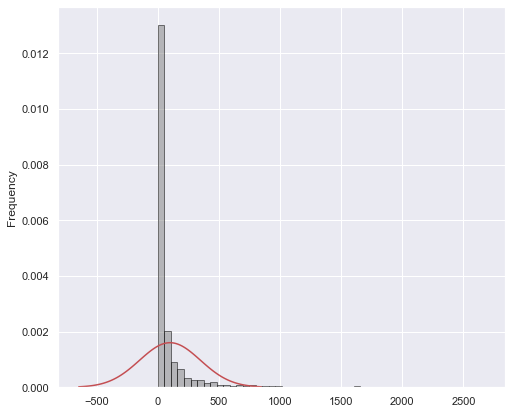

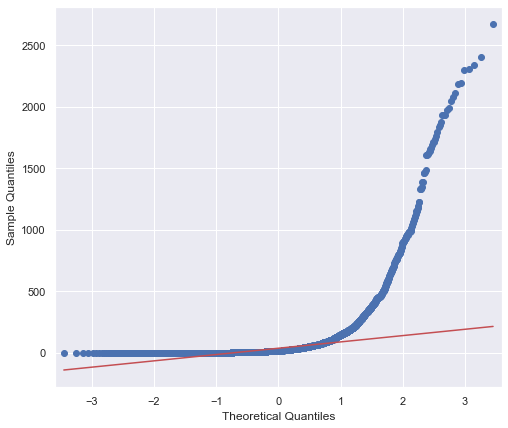

In [23]:
#Normality
#For the IV
stat, p = shapiro(FB['CommentCount24'])
print('Shapiro Statistic=%.3f, p=%.3f' % (stat, p))

FB['CommentCount24'].plot.hist(alpha=0.5, bins=50, grid=True, 
            legend=None, density = True, color = 'gray', edgecolor = 'black')
mu = FB['CommentCount24'].mean()
variance = FB['CommentCount24'].var()
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color = 'r')
plt.show()

qqplot(FB['CommentCount24'], line='q')
plt.show()

Shapiro Statistic=0.293, p=0.000


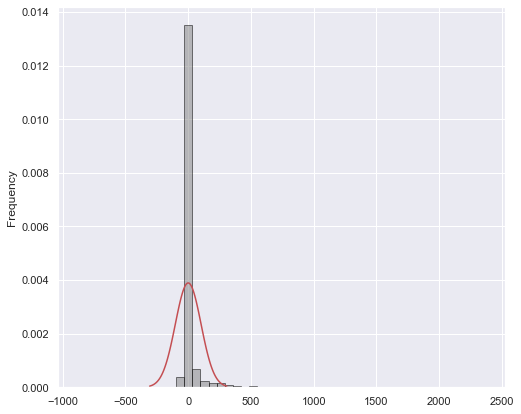

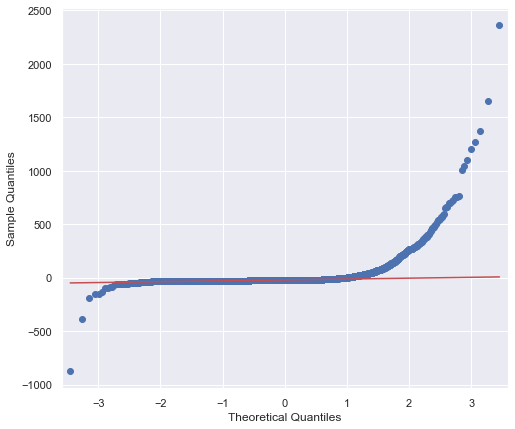

In [24]:
#For the Residuals
stat, p = shapiro(residuals)
print('Shapiro Statistic=%.3f, p=%.3f' % (stat, p))

residuals.plot.hist(alpha=0.5, bins=50, grid=True, 
                    legend=None, density = True, color = 'gray', edgecolor = 'black')
mu = residuals.mean()
variance = residuals.var()
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color = 'r')
plt.show()

qqplot(residuals, line='q')
plt.show()

In [25]:
#Multicollinearity
#Grab the numerical data for the correlation matrix
df_sub = pd.DataFrame(FB, columns=['NumberLikes24', 'CommentCount24', 'PostLength', 'PostShareCount','PostSaturday'])
corrmatrix = df_sub.corr()
print(corrmatrix)

                NumberLikes24  CommentCount24  PostLength  PostShareCount  \
NumberLikes24        1.000000        0.410151   -0.013469        0.200593   
CommentCount24       0.410151        1.000000   -0.025914        0.285577   
PostLength          -0.013469       -0.025914    1.000000       -0.014609   
PostShareCount       0.200593        0.285577   -0.014609        1.000000   
PostSaturday         0.047908       -0.030060   -0.000795       -0.015269   

                PostSaturday  
NumberLikes24       0.047908  
CommentCount24     -0.030060  
PostLength         -0.000795  
PostShareCount     -0.015269  
PostSaturday        1.000000  


In [26]:
# Calculate VIF for IVs
y, X = dmatrices(formula_like="NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostSaturday", data=FB, return_type="dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('CommentCount24 VIF =', vif[1])
print('PostLength VIF =', vif[2])
print('PostShareCount VIF =', vif[3])
print('PostSaturday VIF =', vif[4])

CommentCount24 VIF = 1.0901423954112348
PostLength VIF = 1.0007312731611562
PostShareCount VIF = 1.0889105958345875
PostSaturday VIF = 1.0009558282355517


In [27]:
#Autocorrelation
print('Durbin-Watson =', durbin_watson(residuals))

Durbin-Watson = 1.7156273756937015


In [28]:
#Multivariate regression
MultReg = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostSaturday', data = FB).fit()
MultReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NumberLikes24   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     195.3
Date:                Tue, 05 May 2020   Prob (F-statistic):          1.19e-151
Time:                        18:11:35   Log-Likelihood:                -21348.
No. Observations:                3576   AIC:                         4.271e+04
Df Residuals:                    3571   BIC:                         4.274e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.8240      2.049      4.307      0.000       4.807      12.841
CommentCount24     0.1621      0.007     24.380      0.000       0.149       0.175
PostLength        -0.0006      0.005     -0.138      0.890      -0.010       0.008
PostShareCount     0.0095      0.002      5.772      0.000       0.006       0.013
PostSaturday      15.1148      3.764      4.016      0.000       7.735      22.494
==============================================================================
Omnibus:                     5797.664   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4919157.799
Skew:                          10.446   Prob(JB):                         0.00
Kurtosis:                     183.494   Cond. No.                     2.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#Multivariate regression
MultReg = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostSaturday + PostSunday + PostMonday + PostTuesday +PostWednesday + PostThursday + PostFriday', data = FB).fit()
MultReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NumberLikes24   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     136.2
Date:                Tue, 05 May 2020   Prob (F-statistic):          9.19e-156
Time:                        18:22:31   Log-Likelihood:                -21333.
No. Observations:                3576   AIC:                         4.268e+04
Df Residuals:                    3569   BIC:                         4.272e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         17.9254      2.077      8.629      0.000      13.852      21.998
CommentCount24     0.1629      0.007     24.588      0.000       0.150       0.176
PostLength        -0.0005      0.005     -0.108      0.914      -0.009       0.008
PostShareCount     0.0092      0.002      5.594      0.000       0.006       0.012
PostSaturday       5.9785      3.205      1.866      0.062      -0.305      12.262
PostSunday        34.4835      6.755      5.105      0.000      21.239      47.727
PostMonday      4.033e-16    3.8e-16      1.062      0.288   -3.42e-16    1.15e-15
PostTuesday             0          0        nan        nan           0           0
PostWednesday           0          0        nan        nan           0           0
PostThursday     -13.2496      2.811     -4.714      0.000     -18.760      -7.739
PostFriday        -9.2870      2.809     -3.307      0.001     -14.794      -3.780
==============================================================================
Omnibus:                     5825.285   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5093995.596
Skew:                          10.540   Prob(JB):                         0.00
Kurtosis:                     186.694   Cond. No.                     2.41e+37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.46e-66. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
#Multivariate regression
MultReg = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostSaturday + PostSunday + PostThursday + PostFriday', data = FB).fit()
MultReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NumberLikes24   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     136.2
Date:                Tue, 05 May 2020   Prob (F-statistic):          9.19e-156
Time:                        18:11:35   Log-Likelihood:                -21333.
No. Observations:                3576   AIC:                         4.268e+04
Df Residuals:                    3569   BIC:                         4.272e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         17.9254      2.077      8.629      0.000      13.852      21.998
CommentCount24     0.1629      0.007     24.588      0.000       0.150       0.176
PostLength        -0.0005      0.005     -0.108      0.914      -0.009       0.008
PostShareCount     0.0092      0.002      5.594      0.000       0.006       0.012
PostSaturday       5.9785      3.205      1.866      0.062      -0.305      12.262
PostSunday        34.4835      6.755      5.105      0.000      21.239      47.727
PostThursday     -13.2496      2.811     -4.714      0.000     -18.760      -7.739
PostFriday        -9.2870      2.809     -3.307      0.001     -14.794      -3.780
==============================================================================
Omnibus:                     5825.285   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5093995.596
Skew:                          10.540   Prob(JB):                         0.00
Kurtosis:                     186.694   Cond. No.                     8.17e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
X_new = np.column_stack((10,148,3,0,0,0,1))
X_new = smf.add_constant(X_new)

ynewpred = MultReg.predict(X_new)

AttributeError: module 'statsmodels.formula.api' has no attribute 'add_constant'

In [31]:
#Model Selection
#Comparison with ANOVA
BaseModel = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostSaturday', data = FB).fit()
Model1 = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostSunday', data = FB).fit()
Model2 = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostMonday', data = FB).fit()
Model3 = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostTuesday', data = FB).fit()
Model4 = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostWednesday', data = FB).fit()
Model5 = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostThursday', data = FB).fit()
Model6 = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostFriday', data = FB).fit()

AnovaResults_M1_M2 = anova_lm(Model2, Model1)
print(AnovaResults_M1_M2)
AnovaResults_M1_BM = anova_lm(BaseModel, Model1)
print(AnovaResults_M1_BM)
AnovaResults_M2_M3 = anova_lm(Model2, Model3)
print(AnovaResults_M2_M3)
AnovaResults_M3_M4 = anova_lm(Model3, Model4)
print(AnovaResults_M3_M4)
AnovaResults_M4_M5 = anova_lm(Model4, Model5)
print(AnovaResults_M4_M5)
AnovaResults_M5_M6 = anova_lm(Model5, Model6)
print(AnovaResults_M5_M6)

   df_resid           ssr  df_diff        ss_diff          F    Pr(>F)
0    3572.0  3.222244e+07      0.0            NaN        NaN       NaN
1    3571.0  3.200897e+07      1.0  213465.666268  23.814756  0.000001
   df_resid           ssr  df_diff       ss_diff    F  Pr(>F)
0    3571.0  3.207758e+07      0.0           NaN  NaN     NaN
1    3571.0  3.200897e+07     -0.0  68608.716877 -inf     NaN
   df_resid           ssr  df_diff  ss_diff   F  Pr(>F)
0    3572.0  3.222244e+07      0.0      NaN NaN     NaN
1    3572.0  3.222244e+07     -0.0     -0.0 NaN     NaN
   df_resid           ssr  df_diff  ss_diff   F  Pr(>F)
0    3572.0  3.222244e+07      0.0      NaN NaN     NaN
1    3572.0  3.222244e+07     -0.0     -0.0 NaN     NaN
   df_resid           ssr  df_diff        ss_diff          F    Pr(>F)
0    3572.0  3.222244e+07      0.0            NaN        NaN       NaN
1    3571.0  3.210327e+07      1.0  119171.776873  13.256047  0.000276
   df_resid           ssr  df_diff       ss_diff    

C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\lpz

In [32]:
#Model Selection
#Comparison with ANOVA
BaseModel = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostSaturday', data = FB).fit()
Model1 = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostSunday', data = FB).fit()
Model2 = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostThursday', data = FB).fit()
Model3 = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostFriday', data = FB).fit()

AnovaResults_M1_M2 = anova_lm(Model2, Model1)
print(AnovaResults_M1_M2)
AnovaResults_M1_BM = anova_lm(BaseModel, Model1)
print(AnovaResults_M1_BM)
AnovaResults_M2_M3 = anova_lm(Model2, Model3)
print(AnovaResults_M2_M3)

   df_resid           ssr  df_diff       ss_diff    F  Pr(>F)
0    3571.0  3.210327e+07      0.0           NaN  NaN     NaN
1    3571.0  3.200897e+07     -0.0  94293.889395 -inf     NaN
   df_resid           ssr  df_diff       ss_diff    F  Pr(>F)
0    3571.0  3.207758e+07      0.0           NaN  NaN     NaN
1    3571.0  3.200897e+07     -0.0  68608.716877 -inf     NaN
   df_resid           ssr  df_diff       ss_diff    F  Pr(>F)
0    3571.0  3.210327e+07      0.0           NaN  NaN     NaN
1    3571.0  3.219505e+07     -0.0 -91786.682859  inf     NaN


C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\lpz

In [33]:
#Model Selection
#Comparison with ANOVA
BaseModel = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostSaturday', data = FB).fit()
Model1 = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostSunday', data = FB).fit()
Model2 = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostThursday', data = FB).fit()
Model3 = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostFriday', data = FB).fit()

AnovaResults_M2_BM = anova_lm(BaseModel, Model2)
print(AnovaResults_M2_BM)
AnovaResults_M1_BM = anova_lm(BaseModel, Model1)
print(AnovaResults_M1_BM)
AnovaResults_M3_BM = anova_lm(BaseModel, Model3)
print(AnovaResults_M3_BM)

   df_resid           ssr  df_diff       ss_diff    F  Pr(>F)
0    3571.0  3.207758e+07      0.0           NaN  NaN     NaN
1    3571.0  3.210327e+07     -0.0 -25685.172518  inf     NaN
   df_resid           ssr  df_diff       ss_diff    F  Pr(>F)
0    3571.0  3.207758e+07      0.0           NaN  NaN     NaN
1    3571.0  3.200897e+07     -0.0  68608.716877 -inf     NaN
   df_resid           ssr  df_diff        ss_diff    F  Pr(>F)
0    3571.0  3.207758e+07      0.0            NaN  NaN     NaN
1    3571.0  3.219505e+07     -0.0 -117471.855376  inf     NaN


C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\lpz

In [34]:
#Stepwise Regression
DataSubset = pd.DataFrame(FB, columns=['NumberLikes24', 'CommentCount24', 'PostLength', 'PostShareCount','PostSaturday'])

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

model = forward_selected(DataSubset, 'NumberLikes24')
print('Model Selected')
print(model.model.formula)
print('R2=', model.rsquared_adj)

Model Selected
NumberLikes24 ~ CommentCount24 + PostShareCount + PostSaturday + 1
R2= 0.17882519477504233


In [35]:
#Stepwise Regression
DataSubset = pd.DataFrame(FB, columns=['NumberLikes24', 'CommentCount24', 'PostLength', 'PostShareCount','PostSunday'])

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

model = forward_selected(DataSubset, 'NumberLikes24')
print('Model Selected')
print(model.model.formula)
print('R2=', model.rsquared_adj)

Model Selected
NumberLikes24 ~ CommentCount24 + PostShareCount + PostSunday + 1
R2= 0.1805831044282572


In [43]:
#Stepwise Regression', 'PostShareCount','PostSaturday','Pos
DataSubset = pd.DataFrame(FB, columns=['NumberLikes24', 'CommentCount24','PostLength', 'PostShareCount','PostSaturday','PostSunday','PostThursday'])

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

model = forward_selected(DataSubset, 'NumberLikes24')
print('Model Selected')
print(model.model.formula)
print('R2=', model.rsquared_adj)

Model Selected
NumberLikes24 ~ CommentCount24 + PostShareCount + PostSunday + PostSaturday + PostThursday + 1
R2= 0.1851637683607994


In [ ]:
#Stepwise Regression
DataSubset = pd.DataFrame(FB, columns=['NumberLikes24', 'CommentCount24', 'PostLength', 'PostShareCount','PostSaturday',
                                       'PostSunday','PostThursday','PostFriday'])

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

model = forward_selected(DataSubset, 'NumberLikes24')
print('Model Selected')
print(model.model.formula)
print('R2=', model.rsquared_adj)

In [ ]:
# Import Libraries

import stepwiseSelection as ss
import pandas as pd
import statsmodels.formula.api as sm

In [ ]:
# Dependent and Independent Variables

X = FB.drop(columns= "NumberLikes24")

y = FB.NumberLikes24



# Magic Happens

final_vars, iterations_logs = backwardSelection(X,y, model_type="logistic")



# Write Logs To .txt

iterations_file = open("Iterations_logs.txt","w+") 

iterations_file.write(iterations_logs)

iterations_file.close()